# Systems and Signals 414 Practical 3: Detection using correlation

**Aim:** Investigate the use of correlation in the detection of a signal corrupted by noise.

**Hand in:** Please hand in this notebook as a PDF file on sunlearn by Sunday, 18 March at 23:55. To save your notebook to a PDF, you can  print the notebook from your browser and then choose to `Save as PDF`. (If you are doing the practical on a machine with LaTeX, you can also select `File`$\rightarrow$ `Download as` $\rightarrow$ `PDF via LaTeX (.pdf)` directly in the notebook). After exporting your notebook, upload the PDF by clicking on `Practical 3 submission` on sunlearn and following the steps. You may submit your work multiple times; only the last submission will be marked. **No late submissions will be accepted.**

**Task:** Do the following assignment using Jupyter. Document the task indicating your methodology, theoretical results, numerical results and discussions as necessary. Your graphs should have labeled axes with the correct units indicated. If you get stuck with a Numpy or Scipy function, go look up the usage at https://docs.scipy.org. Also take a look at the provided coding examples.

**Preamble code and helper functions:**

In [12]:
#All the necessary imports

#%matplotlib notebook
%matplotlib inline

import pylab as pl
import numpy as np
from scipy import signal
import IPython.display

#Nicer matplotlib dimensions
pl.rcParams['figure.figsize'] = (9,3)

#A helper-function to setup a proper plot
def setup_plot(title, y_label='', x_label='', newfig=True):
    if newfig:
        pl.figure()
    pl.margins(*(pl.array(pl.margins())+0.05))
    pl.title(title)
    pl.ylabel(y_label)
    pl.xlabel(x_label)

#A helper function to plot an additional x-axis at the top
def add_top_axis(x_values, x_label=''):
    _, b = pl.rcParams['figure.figsize']
    pl.gca().title.set_position([.5, 1.18])
    ax1 = pl.gca()
    ax2 = ax1.twiny()
    ax2.margins(*(pl.array(ax1.margins())))
    pl.box(False)
    ln, = ax2.plot(x_values, np.zeros_like(x_values)) # Create a dummy plot
    ln.remove()
    ax2.set_xlabel(x_label)
    
#Download yesterday.wav from courses.ee.sun.ac.za and return it as a numpy array
def download_and_load_audio(url, mono=True, factor_of_2_length=True):
    import os
    import urllib
    import scipy.io
    from scipy.io import wavfile
    
    filename = os.path.split(url)[-1]
    #Download if path does not already exist
    if not os.path.isfile(filename):
        urllib.request.urlretrieve(url, filename)
    sample_frequency, signal_array = wavfile.read(filename)
    #Normalise signal and return
    if mono and len(signal_array.shape)==2:
        signal_array = np.sum(signal_array, axis=1)
    signal_array = signal_array/np.max([np.max(signal_array), -np.min(signal_array)])
    if factor_of_2_length:
        signal_array = signal_array[:2**np.floor(np.log2(len(signal_array))).astype('int')]
    
    return sample_frequency, signal_array

## Questions

The audio for today is *Mad World*, taken from the *Donnie Darko* soundtrack.

Use proper Markdown headings to differentiate between Question 1, Question 2, etc. and label your graphs properly! Follow the hand-in email instructions to the letter!

## Determining a signal delay by means of correlation
Consider a radar system used to determine the distance between its transmitting/receiving antenna
and a particular object:
<img src="radar_image.svg">

The radar transmits a signal $x(t)$, which is reflected by the object and received by the radar as $y(t)$.
Now assume that this reflected signal $y(t)$ is a delayed version of the transmitted signal $x(t)$ with
additive noise $w(t)$; i.e.
$$y(t) = a\cdot x(t - t_D) + w(t).$$
The distance between the radar and the object may be deduced from the time delay $t_D$. To proceed,
let us assume that $x(t)$ and $y(t)$ have been sampled with a sampling period $T$, without any aliasing.
This results in discrete-time signals $x[n] = x(nT)$ and
$$y[n] = y(nT) = a\cdot x(nT - DT) + w(nT) = a\cdot x[n - D] + w[n],$$
where it has been assumed that $t_D = DT$ with $D$ an integer.<br>
For this practical, assume the noise $w$ is also an energy signal.

### Question 1

Derive an algebraic expression for $r_{yx}[i]$ in terms of $r_{xx}[i]$ and $r_{wx}[i]$. Do this by hand; i.e. pen and paper.

### Question 2
Using this result, explain how you could determine $D$ from an estimate of $r_{yx}[i]$. Under what
condition(s) will this scheme be effective?

### Question 3
Let $x[n]$ be the 13-point Barker sequence:
$$x[n] = \{+1,+1,+1,+1,+1,−1,−1,+1,+1,−1,+1,−1,+1\},$$
and let $w[n]$ be zero-mean Gaussian white noise with a variance ${\sigma}^2_w=0.01$ (this can be generated
using `np.random.normal` with appropriate scaling).

**a)** Why is this an appropriate choice of $x[n]$?
Explain by displaying $r_{xx}[i]$ using `np.correlate`. Note the keyword argument `mode` for `np.correlate` with options `'valid'`, `'same'`, and `'full'`. See `help(np.correlate)` and `help(np.convolve)` to figure out which one to use.

**b)** Take $a = 0.9$ and $D = 20$, and now calculate and stem $y[n]$ for $0 \leq n \leq 199$.

**c)** From your result in (3b), use `np.correlate` to determine $r_{yx}[i]$. Stem the result and identify the delay $D$.

**d)** Repeat (3b) and (3c), but with $\sigma^2_w = 0.1$ and $\sigma^2_w = 1$. What is the significance of $\sigma_w$ and how
does it affect the identification of $D$?

### Question 4
Next, let $x[n]$ instead be the following 13-point sequence:
$$x[n] = \{+1,+1,+1,+1, 0, 0, 0, 0, 0,+1,+1,+1,+1\}.$$

**a)** Is this a suitable choice for $x[n]$? Why (or why not)?

**b)** Repeat steps (3b) and (3c) of Question 3 with $w[n]$ taken as zero-mean Gaussian white noise
with a variance $\sigma^2_w = 0.1$. Can you identify the delay $D$?

### Question 5
Now let $x[n]$ itself consist of $150$ samples of Gaussian white noise with variance $\sigma^2_x = 1.0$.

**a)** Is this an appropriate choice for $x[n]$? Why (or why not)?

**b)** Repeat steps (3b) and (3c) of Question 3 with $w[n]$ taken as zero-mean Gaussian white noise
with a variance $\sigma_w^2 = 1.0$. Can you identify the delay $D$ from the plot of $r_{yx}[i]$?

### Question 6
Finally, let $x[n]$ consist of $13$ samples of Gaussian white noise with variance $\sigma^2_x=1.0$. Repeat
steps (3a) and (3b) of Question 3 with $w[n]$ taken as zero-mean white noise with a variance
$\sigma^2_w = 1.0$. How do you results compare with those you obtained from the previous question?
Explain your observations. Comment on the advantages and disadvantages of using the Barker
sequence over the noise sequences. Under which circumstances would one or the other be a
better choice?

### Bonus Question
Does the plot of Donnie Darko make any sense? Motivate your answer.

### Additional Question 1

Note that this question is not compulsory.

Consider the discrete-time signal $y[n]$ by loading the audio in `mad_world_clean.wav` as a numpy array using the `download_and_load_audio` function.

Load and listen to the signal using `IPython.display.Audio`. Note the white noise in the background.

Somewhere within the noise contained in $y[n]$ is the sequence $x[n]$ as<br>
$\ \ \ \ \ \ x[n]$ = `np.random.RandomState(0).normal(0, 0.01, 40000)`.<br>
In other words, $x[n]$ is $40000$ samples taken from a normal distribution of variance $\sigma_x = 0.01$, generated from Numpy with a seed of $0$ (in order to yield the same result between platforms).

**a)** Use `np.correlate` to find the starting index of the sequence $x[n]$ within the signal $y[n]$. Plot the cross-correlation $r_{yx}[i]$ with the correct $i$-axis. What is the starting index of $x[n]$ within y[n]?

**b)** Verify the starting position of $x[n]$ found in (a), by generating $\tilde{y}[n]$ as $y[n]$, but with signal $x[n]$ removed at the appropriate position and listen to $\tilde{y}[n]$. If the signal is composed correctly, there should be 4 seconds of audio that is absent of noise.

**c)** Note the activity at the end part of $r_{yx}[i]$. Why are end values in general larger than the values at the start of $r_{yx}[i]$? (Hint, this is specific to this audio track.)

### Coding examples
**Plotting an additional axis**

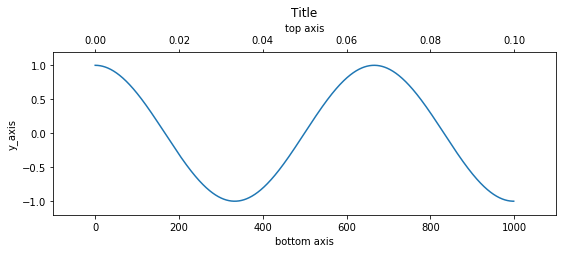

In [13]:
#Normal plot with matplotlib plot and setup_plot helper
setup_plot('Title', 'y_axis', 'bottom axis')
pl.plot(np.arange(1000), np.cos(np.linspace(0, 3*np.pi, 1000)));

#Add an extra x-axis at the top with 1e-4 scale
add_top_axis(np.arange(1000)*1e-4, 'top axis')

**Note the difference between linspace and arange:**

In [14]:
#Every second element from 0 upto (but excluding) 10
print('a)', np.arange(0,10,1))

#5 elements from 0 upto (but excluding) 10
print('b)', np.linspace(0,10,10,False))

#5 elements from 0 upto 10 (avoid!!!)
print('c)', np.linspace(0,10,10))

a) [0 1 2 3 4 5 6 7 8 9]
b) [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
c) [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]


#### Audio player with Ipython.lib.display.Audio

In [15]:
example_signal = np.sin(2*np.pi*500*np.linspace(0,5,50000))
IPython.lib.display.Audio(rate=10000,
                          data=example_signal)

#### Correlation and indexing

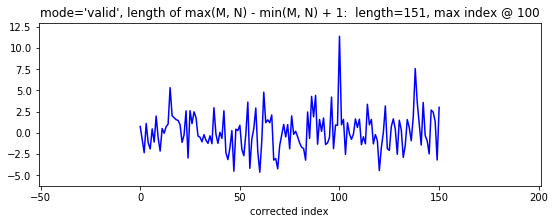

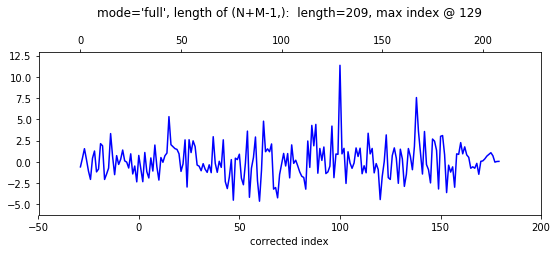

In [16]:
np_random = np.random.RandomState(1)
A = np_random.uniform(-1, 1, 30)  #length 30
B = np.r_[np_random.uniform(-1, 1, 100),
          A,
          np_random.uniform(-1, 1, 50)] #length 180

#Cropped correlation
corr = np.correlate(B, A, mode='valid')
setup_plot(r"mode='valid', length of max(M, N) - min(M, N) + 1:  length=%d, max index @ %d"%(len(corr), np.argmax(corr)),
           '', 'corrected index')
pl.plot(-30,0); pl.plot(180,0); #Extend x-axis from -30 -> 180
pl.plot(corr, 'b');

#Full correlation
corr = np.correlate(B, A, mode='full')
corr_idx = np.arange(len(corr))-(len(A)-1)
setup_plot(r"mode='full', length of (N+M-1,):  length=%d, max index @ %d"%(len(corr), np.argmax(corr)),
           '', 'corrected index')
pl.plot(corr_idx, corr, 'b');
add_top_axis(np.arange(len(corr)), '');

# Answer space:

<Container object of 3 artists>

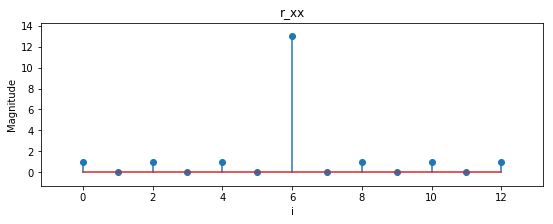

In [17]:
#Question 3a
x = np.array([1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1])
w = np.random.normal(loc=0, scale=np.sqrt(0.01), size=(x.size))
r = np.correlate(a=x, v=x, mode='same')
setup_plot("r_xx", "Magnitude", "i")
pl.stem(r)

<Container object of 3 artists>

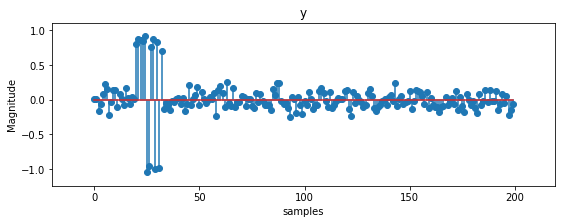

In [18]:
#Question 3b
a = 0.9
D = 20
n = 200

w = np.random.normal(loc = 0, scale=np.sqrt(0.01), size=n)

y = w
y[D:D+x.size] += a*x

setup_plot("y", "Magnitude", "samples")
pl.stem(y)

20


'\nD is in fact 20 as the maximum x-corrolation is at that point\n'

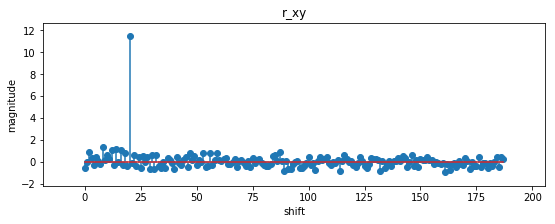

In [19]:
#Question 3c
r = np.correlate(a=y, v=x, mode='valid')
print(np.argmax(r))
setup_plot("r_xy", "magnitude", "shift")
pl.stem(r)
'''
D is in fact 20 as the maximum x-corrolation is at that point
'''

20


'\nD is still correct and the cross corrolation is still effective\n'

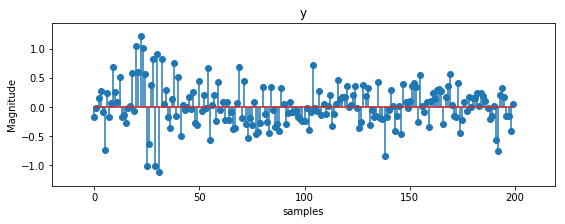

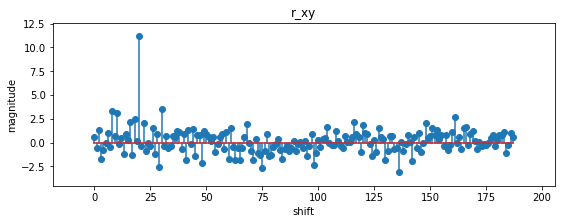

In [20]:
#Question 3d
a = 0.9
D = 20
n = 200

w = np.random.normal(loc = 0, scale=np.sqrt(0.1), size=n)

y = w
y[D:D+x.size] += a*x

setup_plot("y", "Magnitude", "samples")
pl.stem(y)

r = np.correlate(a=y, v=x, mode='valid')
print(np.argmax(r))
setup_plot("r_xy", "magnitude", "shift")
pl.stem(r)
'''
D is still correct and the cross corrolation is still effective
'''

'\nThis is not a good signal to use as there are many larger rxx values, this will make cross correlation more difficult\n'

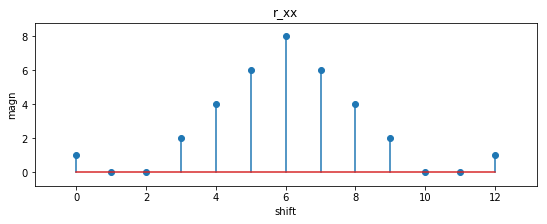

In [25]:
#Question 4a
x = np.array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])
r = np.correlate(a=x, v=x, mode='same')
setup_plot("r_xx", "magn", "shift")
pl.stem(r)
'''
This is not a good signal to use as there are many larger rxx values, this will make cross correlation more difficult
'''

20


'\nThe value of D is still correct, however this time it is more difficult than before\n'

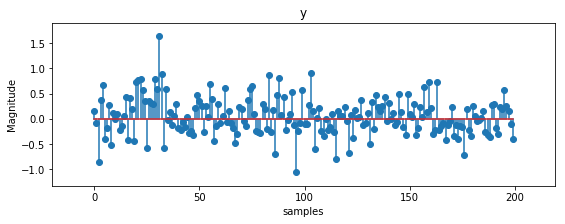

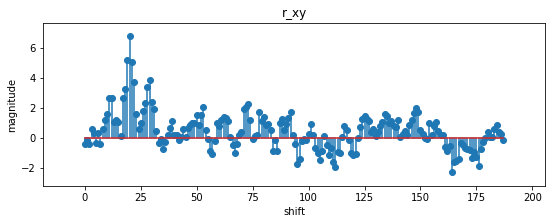

In [27]:
#Question 4b
a = 0.9
D = 20
n = 200

w = np.random.normal(loc = 0, scale=np.sqrt(0.1), size=n)

y=w
                     
y[D:D+x.size] += a*x

setup_plot("y", "Magnitude", "samples")
pl.stem(y)

r = np.correlate(a=y, v=x, mode='valid')
print(np.argmax(r))
setup_plot("r_xy", "magnitude", "shift")
pl.stem(r)
'''
The value of D is still correct, however this time it is more difficult than before
'''

'\nThis signal is suprisingly good to use, the peak rxx is much higher than all other peaks\n'

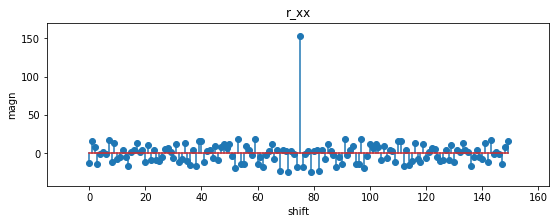

In [28]:
#Question 5a
x = np.random.normal(loc=0, scale=np.sqrt(1), size=150)
r = np.correlate(a=x, v=x, mode='same')
setup_plot("r_xx", "magn", "shift")
pl.stem(r)
'''
This signal is suprisingly good to use, the peak rxx is much higher than all other peaks
'''

20


'\nAgain, the value of D is easy to find\n'

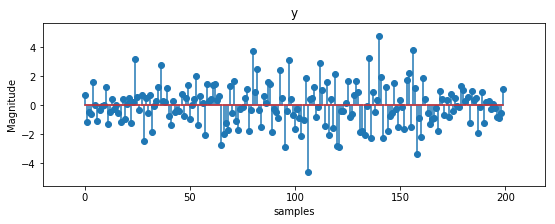

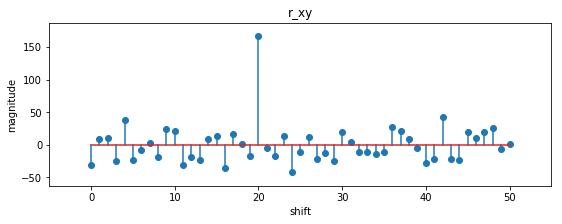

In [29]:
#Question 5b
w = np.random.normal(loc=0, scale=np.sqrt(1), size=200)

y = w
y[D:D+x.size] += a*x

setup_plot("y", "Magnitude", "samples")
pl.stem(y)

r = np.correlate(a=y, v=x, mode='valid')
print(np.argmax(r))
setup_plot("r_xy", "magnitude", "shift")
pl.stem(r)

'''
Again, the value of D is easy to find
'''

91


'\nD cannot be easily obtained as there are too many peak values with large magnitudes, hence this is not very reliable\n'

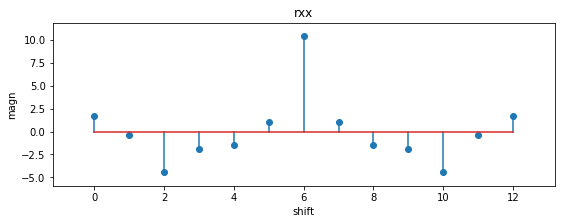

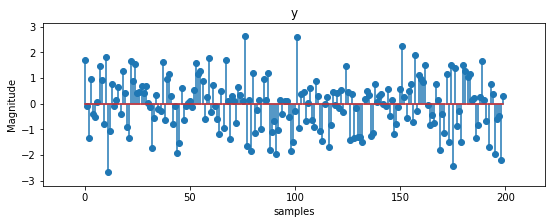

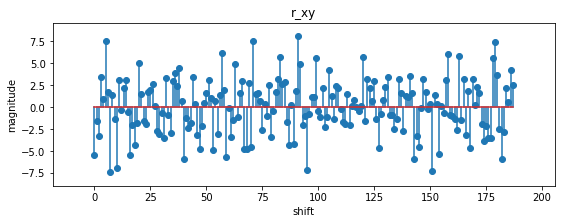

In [30]:
#Question 6
n = 13
x = np.random.normal(loc =0, scale=np.sqrt(1), size=n)
r = np.correlate(a=x, v=x, mode='same')
setup_plot("rxx", "magn", "shift")
pl.stem(r)

'''
Off peak rxx values are close to largest peak, hence this signal could be problematic
'''

w = np.random.normal(loc=0, scale=np.sqrt(1), size=200)

y = w
y[D:D+x.size] += a*x

setup_plot("y", "Magnitude", "samples")
pl.stem(y)

r = np.correlate(a=y, v=x, mode='valid')
print(np.argmax(r))
setup_plot("r_xy", "magnitude", "shift")
pl.stem(r)

'''
D cannot be easily obtained as there are too many peak values with large magnitudes, hence this is not very reliable
'''